In [ ]:
import torch

if torch.cuda.is_available():
  device = torch.device('cuda')

  print('there are %d GPU(s) available.' % torch.cuda.device_count())

  print('we will use the GPU: ', torch.cuda.get_device_name(0))

else:
  print("No GPU available, using the CPU instead")
  device = torch.device("cpu")

there are 1 GPU(s) available.
we will use the GPU:  Tesla T4


In [ ]:
!pip install contractions

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

# df = pd.read_csv("emotion_dataset.csv")

# df.info()

In [ ]:
df1 = pd.read_excel('Reddit_Combi.xlsx')
df2 = pd.read_excel('Twitter_Non-Advert (1).xlsx')

In [ ]:
df1 = df1.drop(['title'],axis=1)
df1 = df1.drop(['body'],axis=1)
df1 = df1.rename(columns={"Body_Title": "text"})
df2 = df2.sort_values(by='label')
df2 = df2.iloc[:783,:]
frames = [df1, df2]

In [ ]:
df = pd.concat(frames)
df.columns = ['Text', 'Label']
df.head()

,Text,Label
0,Envy to other is swallowing me Im from develop...,1
1,Nothin outta the ordinary. Paradise. Job stres...,1
2,Almost 49 and the chasm of emptiness has never...,1
3,I’m happy again After my closest friend left m...,0
4,Is it possible to recover from such a traumati...,1


In [ ]:
df

,Text,Label
0,Envy to other is swallowing me Im from develop...,1
1,Nothin outta the ordinary. Paradise. Job stres...,1
2,Almost 49 and the chasm of emptiness has never...,1
3,I’m happy again After my closest friend left m...,0
4,Is it possible to recover from such a traumati...,1
...,...,...
421,Via Faith Crittenden and Lorri Perez of sugges...,0
406,pri5s Happy birthday JK I Love BTS Iran Iran I...,0
385,Glad to see federal leaders committing to acti...,0
444,sparkles GIVEAWAY RT to win 18K Gold Pendant ...,0


In [ ]:
# df.drop("Unnamed: 0", axis = 1, inplace = True)

In [ ]:
# df = df[(df.sentiment != "none")]
# df = df.replace({'sentiment' : {'negative':0, 'neutral':1, 'positive':2}})
df.head()

,Text,Label
0,Envy to other is swallowing me Im from develop...,1
1,Nothin outta the ordinary. Paradise. Job stres...,1
2,Almost 49 and the chasm of emptiness has never...,1
3,I’m happy again After my closest friend left m...,0
4,Is it possible to recover from such a traumati...,1


In [ ]:
from bs4 import BeautifulSoup

def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def stopwords_removal(words):
    list_stopwords = nltk.corpus.stopwords.words('english')
    return [word for word in words if word not in list_stopwords]

In [ ]:
import re
import nltk
import tqdm
import unicodedata
import contractions
# from nltk import punkt
# import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize

def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    #case folding
    doc = doc.lower()
    #remove special characters\whitespaces
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()
    #tokenize
    doc = word_tokenize(doc)
    #filtering
    doc = stopwords_removal(doc)
    norm_docs.append(doc)

  norm_docs = [" ".join(word) for word in norm_docs]
  return norm_docs

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = df.rename(columns={"Text":"text", "Label":"label"})
df.text = pre_process_corpus(df.text)


100%|██████████| 3906/3906 [00:05<00:00, 754.64it/s] 


In [ ]:
sentences = df.text
labels = df.label

In [ ]:
!pip install transformers
from transformers import BertTokenizer

print("load BERT Tokenizer")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_cased = True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.7 MB/s eta 0:00:00
load BERT Tokenizer


In [ ]:
print('Original:', sentences[0])
print('Tokenized:', tokenizer.tokenize(sentences[0]))
print('Token IDS:', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

Original: envy swallowing developingcountry indonesia temporary work overseas 3 years contract hard labor job stressful next year contract finish stay job social life depression got worse envy developed country country good afford anything want equality currency exchange need work 1520 years big company jakartaour capital city get equal amount saving money got 3 years working yes right saving money spending money yes going rich person young age think society sick gap un equality beetwen developing vs developed country poor vs rich big right sorry look like evil person thisi almost wish war happen world end got reseted everyone another chance gain equality poor finally chance better life world order stay way eventually collapse soon
Tokenized: ['envy', 'swallowing', 'developing', '##co', '##unt', '##ry', 'indonesia', 'temporary', 'work', 'overseas', '3', 'years', 'contract', 'hard', 'labor', 'job', 'stress', '##ful', 'next', 'year', 'contract', 'finish', 'stay', 'job', 'social', 'life',

In [ ]:
input_ids = []
for sent in sentences:
    encoded_sent = tokenizer.encode(sent, add_special_tokens = True)
    input_ids.append(encoded_sent)

print('Original:', sentences[0])
print('Token IDS:', input_ids[0])

Token indices sequence length is longer than the specified maximum sequence length for this model (2792 > 512). Running this sequence through the model will result in indexing errors


Original: envy swallowing developingcountry indonesia temporary work overseas 3 years contract hard labor job stressful next year contract finish stay job social life depression got worse envy developed country country good afford anything want equality currency exchange need work 1520 years big company jakartaour capital city get equal amount saving money got 3 years working yes right saving money spending money yes going rich person young age think society sick gap un equality beetwen developing vs developed country poor vs rich big right sorry look like evil person thisi almost wish war happen world end got reseted everyone another chance gain equality poor finally chance better life world order stay way eventually collapse soon
Token IDS: [101, 21103, 18468, 4975, 3597, 16671, 2854, 6239, 5741, 2147, 6931, 1017, 2086, 3206, 2524, 4450, 3105, 6911, 3993, 2279, 2095, 3206, 3926, 2994, 3105, 2591, 2166, 6245, 2288, 4788, 21103, 2764, 2406, 2406, 2204, 8984, 2505, 2215, 9945, 9598, 386

In [ ]:
print('Max Sentence length', max([len(sen) for sen in input_ids]))


Max Sentence length 2792


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LEN = 256

print('padding/truncating all sentences to %d values' % MAX_LEN)
print('padding token:"{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype='long', value=0, truncating='post', padding='post')

print('Done')

padding/truncating all sentences to 256 values
padding token:"[PAD]", ID: 0
Done


In [ ]:
attention_mask = []

for sent in input_ids:
    att_mask = [int(token_id > 0) for token_id in sent]

    attention_mask.append(att_mask)

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_labels, test_labels = train_test_split(input_ids, labels, random_state=42, test_size=0.1)
train_mask, test_mask, _, _ = train_test_split(attention_mask, labels, random_state=42, test_size=0.1)

train_input, validation_input, train_labels, validation_labels = train_test_split(train_input, train_labels, random_state=42, test_size=0.1)
train_mask, validation_mask, _, _ = train_test_split(train_mask, train_mask, random_state=42, test_size=0.1)

In [ ]:
import numpy as np

print('---Train---')
print('input: ', train_input.shape)
print('label: ', train_labels.shape)
print('mask: ', np.array(train_mask).shape)

print('---Validation---')
print('input: ', validation_input.shape)
print('label: ', validation_labels.shape)
print('mask: ', np.array(validation_mask).shape)

print('---Test---')
print('input: ', test_input.shape)
print('label: ', test_labels.shape)
print('mask: ', np.array(test_mask).shape)

---Train---
input:  (3163, 256)
label:  (3163,)
mask:  (3163, 256)
---Validation---
input:  (352, 256)
label:  (352,)
mask:  (352, 256)
---Test---
input:  (391, 256)
label:  (391,)
mask:  (391, 256)


In [ ]:
train_labels.reset_index(inplace = True, drop = True)
validation_labels.reset_index(inplace = True, drop = True)
test_labels.reset_index(inplace = True, drop = True)
# test_labels = torch.tensor(test_labels)

train_input = torch.tensor(train_input)
train_labels = torch.tensor(train_labels)
train_mask = torch.tensor(train_mask)

validation_input = torch.tensor(validation_input)
validation_labels = torch.tensor(validation_labels)
validation_mask = torch.tensor(validation_mask)

test_input = torch.tensor(test_input)
test_labels = torch.tensor(test_labels)
test_mask = torch.tensor(test_mask)

In [ ]:
validation_labels

tensor([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32

train_data = TensorDataset(train_input, train_mask, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_input, validation_mask, validation_labels)
validation_sampler = RandomSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

test_data = TensorDataset(test_input, test_mask, test_labels)
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels = 3, output_attentions = False, output_hidden_states = False)
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
params = list(model.named_parameters())

print("The BERT model has {:} different named parameters.".format(len(params)))

print("==== Embedding Layer ====")
for p in params[0:5]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("==== First Transformers ====")
for p in params[5:21]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("==== Output Layer ====")
for p in params[-4:]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.
==== Embedding Layer ====
bert.embeddings.word_embeddings.weight                       (30522, 768)
bert.embeddings.position_embeddings.weight                     (512, 768)
bert.embeddings.token_type_embeddings.weight                     (2, 768)
bert.embeddings.LayerNorm.weight                                   (768,)
bert.embeddings.LayerNorm.bias                                     (768,)
==== First Transformers ====
bert.encoder.layer.0.attention.self.query.weight               (768, 768)
bert.encoder.layer.0.attention.self.query.bias                     (768,)
bert.encoder.layer.0.attention.self.key.weight                 (768, 768)
bert.encoder.layer.0.attention.self.key.bias                       (768,)
bert.encoder.layer.0.attention.self.value.weight               (768, 768)
bert.encoder.layer.0.attention.self.value.bias                     (768,)
bert.encoder.layer.0.attention.output.dense.weight             (768, 768)
bert.e

In [ ]:
optimizer = AdamW(model.parameters(), lr = 2e-5, eps = 1e-8 )


In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 5

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0, num_training_steps = total_steps)

In [ ]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import time
import random
import datetime

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

loss_values = []

for epoch_i in range(0, epochs):

  # ===================================
  #              Training
  # ===================================

  print("======= Epoch {:} / {:} =======".format(epoch_i+1, epochs))
  print("Training...")

  t0 = time.time()

  total_loss = 0

  model.train()

  # For each batch of training data
  for step, batch in enumerate(train_dataloader):

    # Progress update every 40 batches
    if step % 40 == 0 and not step == 0:
      elapsed = format_time(time.time() - t0)

      print("Batch {:>5,} of {:>5,}.     Elapsed: {:}".format(step, len(train_dataloader), elapsed))

    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    model.zero_grad()

    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)

    loss = outputs[0]

    total_loss += loss.item()

    loss.backward()

    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    optimizer.step()

    scheduler.step()

  avg_train_loss = total_loss / len(train_dataloader)

  loss_values.append(avg_train_loss)

  print("   Average training loss: {0:.2f}".format(avg_train_loss))
  print("   Training epoch took: {:}".format(format_time(time.time() - t0)))

  # ===================================
  #             Validation
  # ===================================

  print("Running Validation...")

  t0 = time.time()

  model.eval()

  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  for batch in validation_dataloader:

    batch = tuple(t.to(device) for t in batch)

    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
      outputs = model(b_input_ids,
                      token_type_ids=None,
                      attention_mask=b_input_mask)

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)

    eval_accuracy += tmp_eval_accuracy

    nb_eval_steps += 1

  print("Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
  print("Validation took: {:}".format(format_time(time.time() - t0)))

print("Training complete!")

======= Epoch 1 / 5 =======
Training...
Batch    40 of    99.     Elapsed: 0:00:50
Batch    80 of    99.     Elapsed: 0:01:40
   Average training loss: 0.36
   Training epoch took: 0:02:05
Running Validation...
Accuracy: 0.93
Validation took: 0:00:05
======= Epoch 2 / 5 =======
Training...
Batch    40 of    99.     Elapsed: 0:00:50
Batch    80 of    99.     Elapsed: 0:01:41
   Average training loss: 0.14
   Training epoch took: 0:02:05
Running Validation...
Accuracy: 0.94
Validation took: 0:00:05
======= Epoch 3 / 5 =======
Training...
Batch    40 of    99.     Elapsed: 0:00:51
Batch    80 of    99.     Elapsed: 0:01:41
   Average training loss: 0.09
   Training epoch took: 0:02:05
Running Validation...
Accuracy: 0.95
Validation took: 0:00:05
======= Epoch 4 / 5 =======
Training...
Batch    40 of    99.     Elapsed: 0:00:51
Batch    80 of    99.     Elapsed: 0:01:41
   Average training loss: 0.05
   Training epoch took: 0:02:05
Running Validation...
Accuracy: 0.95
Validation took: 0:00

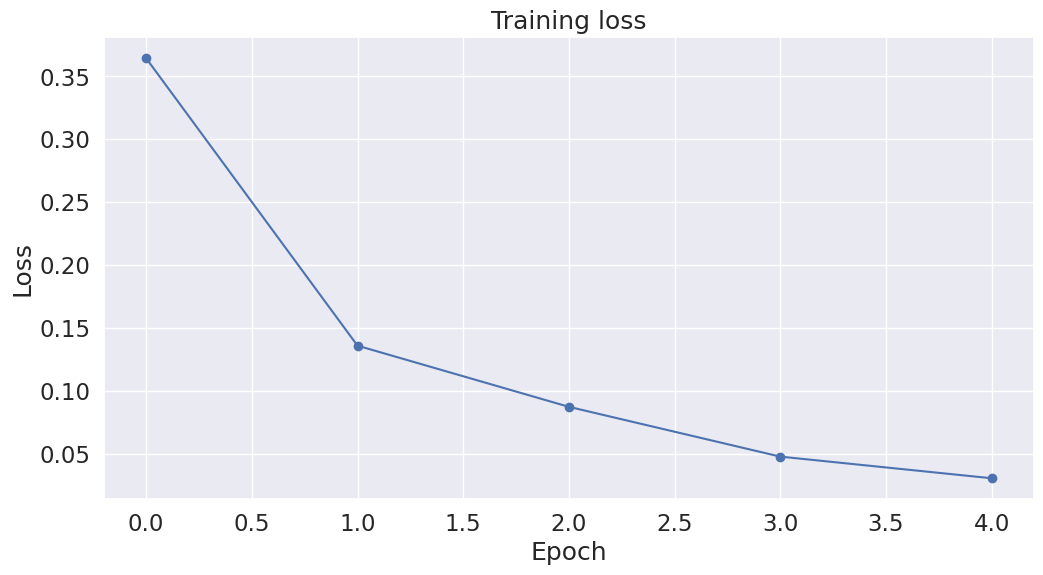

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(loss_values, 'b-o')

plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [ ]:
print("Predicting labels for {:,} test sentences".format(len(test_input)))

model.eval()

prediction, true_labels = [], []

for batch in test_dataloader:
  batch = tuple(t.to(device) for t in batch)

  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask)

  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  prediction.append(logits)
  true_labels.append(label_ids)

print(" DONE.")

Predicting labels for 391 test sentences
 DONE.


In [ ]:
from sklearn.metrics import matthews_corrcoef

# evaluation for data imbalance
flat_prediction = [item for sublist in prediction for item in sublist]
flat_prediction = np.argmax(flat_prediction, axis=1).flatten()

flat_true_labels = [item for sublist in true_labels for item in sublist]

mcc = matthews_corrcoef(flat_true_labels, flat_prediction)

print("MCC: %.3f" %mcc)

MCC: 0.891


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(flat_true_labels, flat_prediction)

print("ACC: %f" %acc)

ACC: 0.956522


In [ ]:
from sklearn.metrics import matthews_corrcoef

# evaluation for data imbalance
flat_prediction = [item for sublist in prediction for item in sublist]
flat_prediction = np.argmax(flat_prediction, axis=1).flatten()

flat_true_labels = [item for sublist in true_labels for item in sublist]

mcc = matthews_corrcoef(flat_true_labels, flat_prediction)

print("MCC: %.3f" %mcc)

MCC: 0.891


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(flat_true_labels, flat_prediction)

print("ACC: %.3f" %acc)

ACC: 0.957


In [ ]:
import joblib
import pickle

In [ ]:
joblib.dump(model, 'bert.pkl')

['bert.pkl']

## Predict

In [ ]:
 !pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pickle
import joblib
import torch
from transformers import BertTokenizer
from transformers import TextClassificationPipeline
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# !pip install transformers
# from transformers import BertTokenizer

# print("load BERT Tokenizer")
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_cased = True)
# model.cpu()
# print(f"Model is on device: {next(model.parameters()).device}")
# pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=True)
# output = pipe(inp)
# print(inp)
# stress_score = output[0][1]['score']
# nstress_score = output[0][0]['score']
# if nstress_score > stress_score:
#   print('Not Stress')
# else:
#   print('Stress')

In [ ]:
import pickle
import joblib
import torch
from transformers import BertTokenizer
from transformers import TextClassificationPipeline
import pandas as pd
import numpy as np
def predict(inp):
  print("load BERT Tokenizer")
  tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_cased = True)
  pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=True)
  output = pipe(inp)
  print(inp)
  stress_score = output[0][1]['score']
  nstress_score = output[0][0]['score']
  if nstress_score > stress_score:
    print('Not Stress')
  else:
    print('Stress')